In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
import seaborn as sns

In [4]:
from math import exp, ceil

In [5]:
%matplotlib inline

In [6]:
class Option:
    def __compute_width(self):
        dt = (ceil(float(365)/self.term_unit))/float(self.term_step_count)
        M = exp(-self.reversion_rate * dt) - 1.0
        jmax = int((-0.184 / M) + 1)
        return 2*jmax+1
    
    def __compute_height(self):
        return int(self.term_step_count * (ceil(float(365)/self.term_unit)) * self.maturity) + 1
    
    def __init__(self, term_unit, maturity, term_step_count, reversion_rate):
        self.term_unit = term_unit
        self.maturity = maturity
        self.term_step_count = term_step_count
        self.reversion_rate = reversion_rate
        self.width = self.__compute_width()
        self.height = self.__compute_height()

In [31]:
def get_row_list_from_string(row):
    return row.replace('[', '').replace(']', '').replace('\n', '').split(',')

def get_options_from_row_list(x):
    maturity = int(float(x[1]))
    term_unit = int(x[3])
    term_step_count = int(x[4])
    reversion_rate = float(x[5])
    return Option(term_unit, maturity, term_step_count, reversion_rate)

def get_options(filename):
    with open(filename , 'r') as f:
        return list(map(get_options_from_row_list, np.array(list(map(get_row_list_from_string, f.readlines()))).T))

In [38]:
def print_jointplots(filenames):
    for f in filenames:
        options = get_options(f)
        op_len = len(options)

        widths = np.array(list(map(lambda o: o.width,options)))
        heights = np.array(list(map(lambda o: o.height,options)))

        print('file: ' + f)
        h = sns.jointplot(x=widths,
                  y=heights,
                  kind='scatter',
                  size=13,
                  color='red') # bi-variate

        h.set_axis_labels('tree width', 'tree height', fontsize=16)

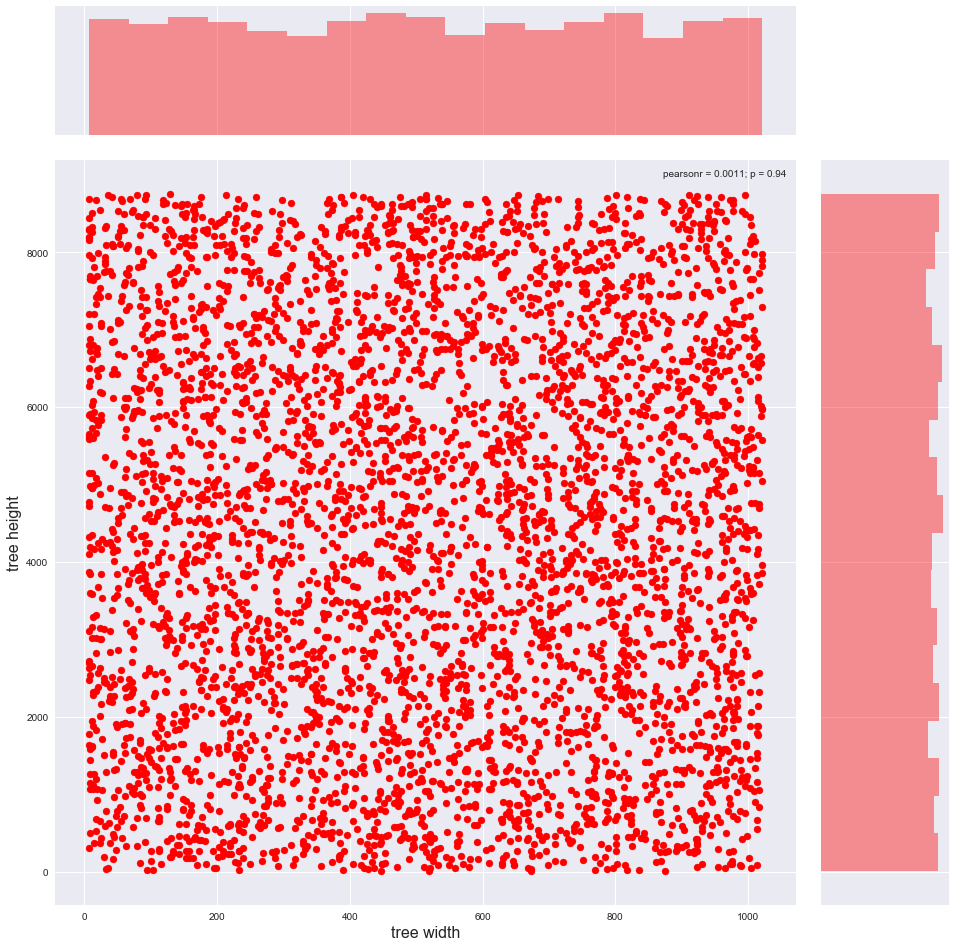

In [33]:
filenames = ["1_RAND.in"]
print_jointplots(filenames)

/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


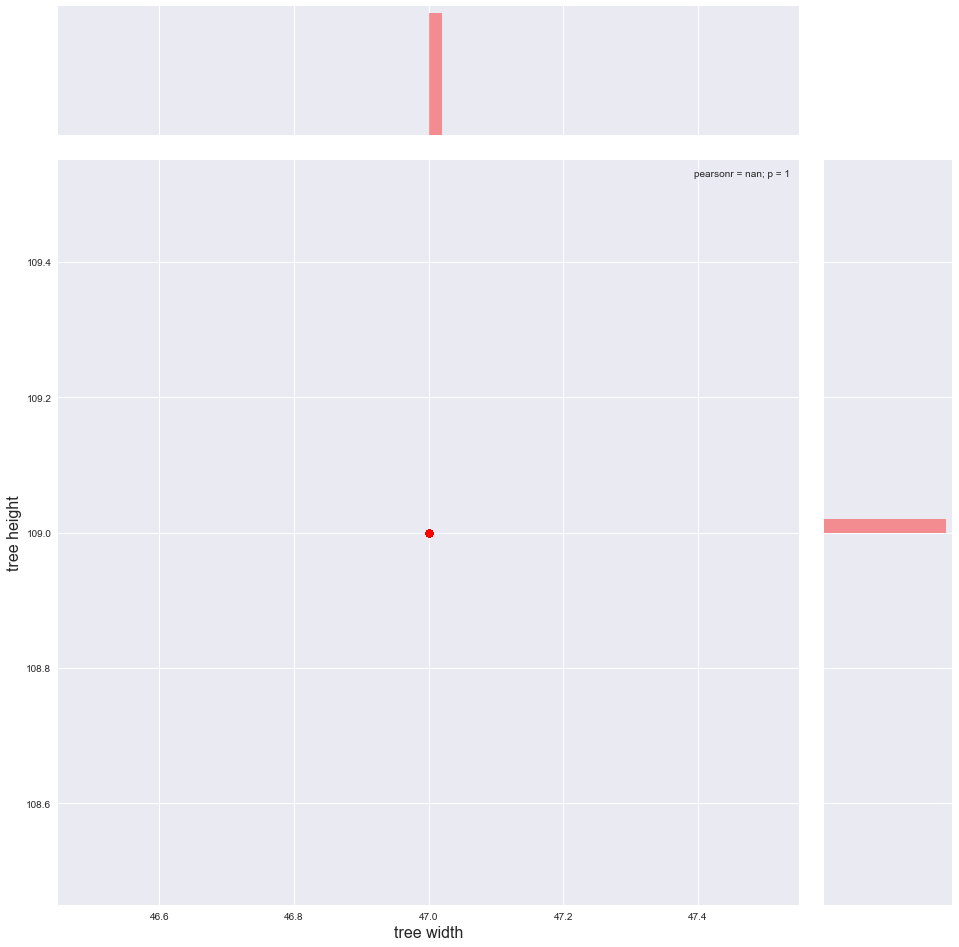

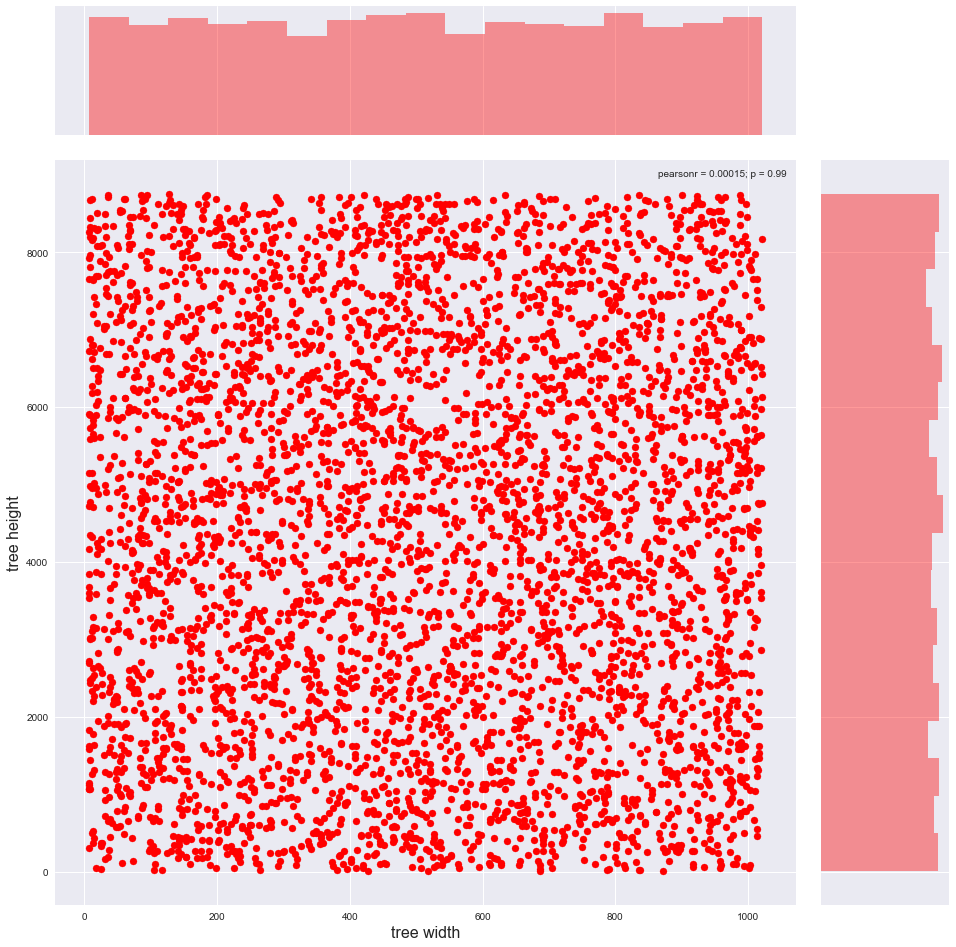

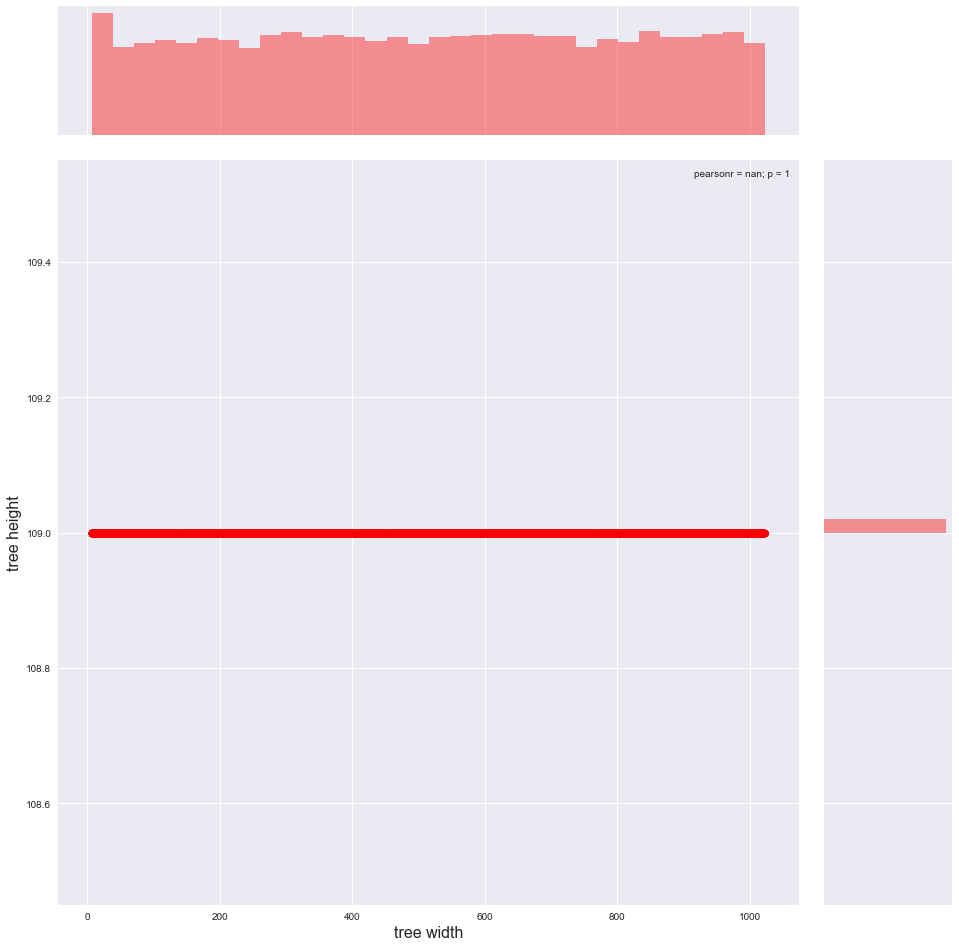

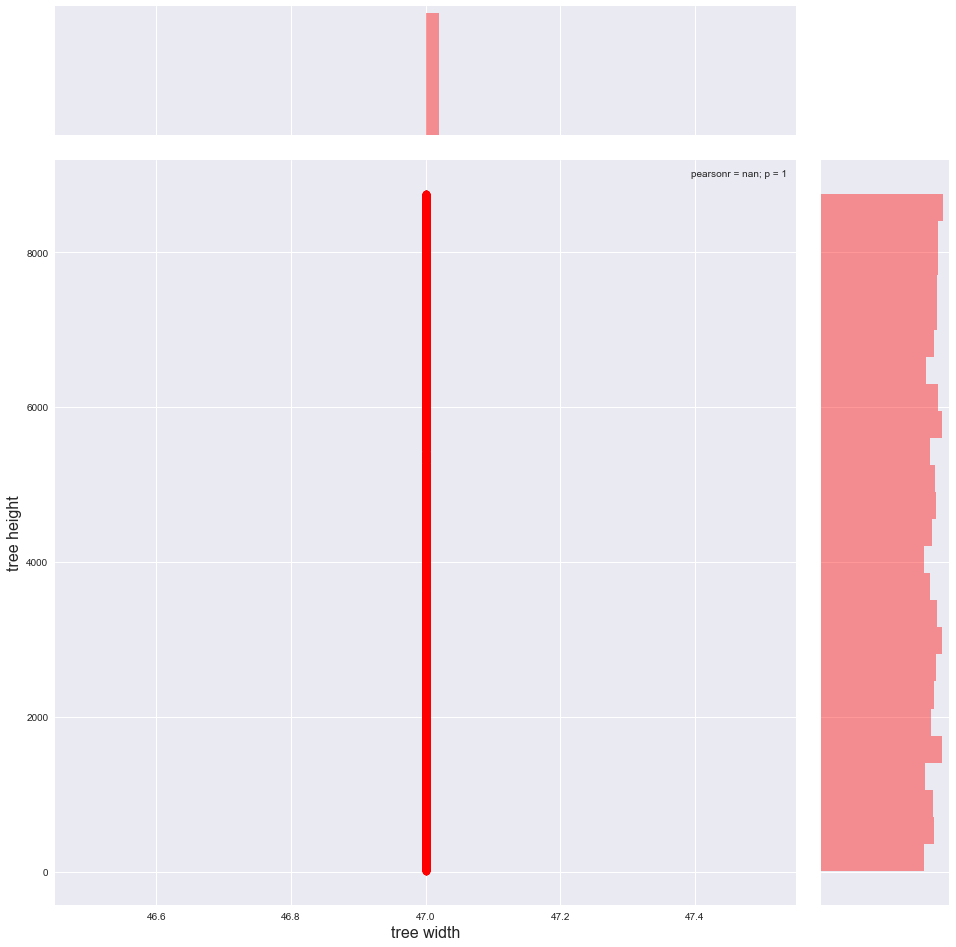

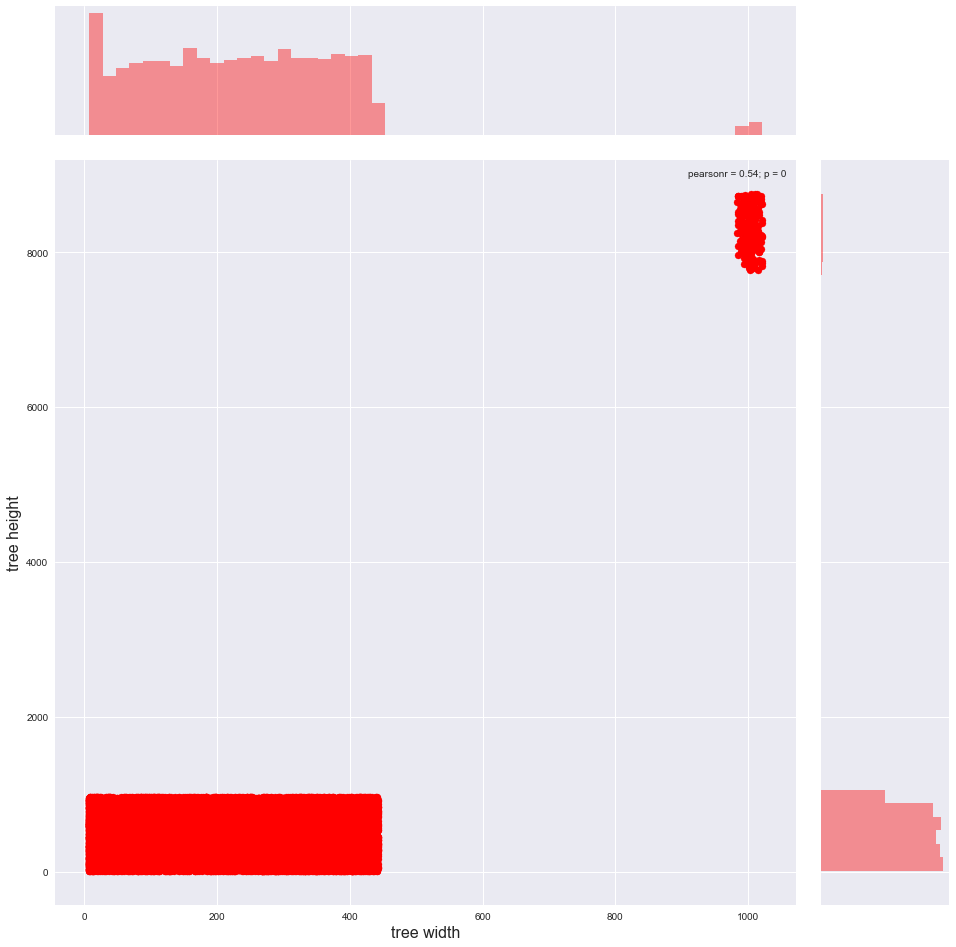

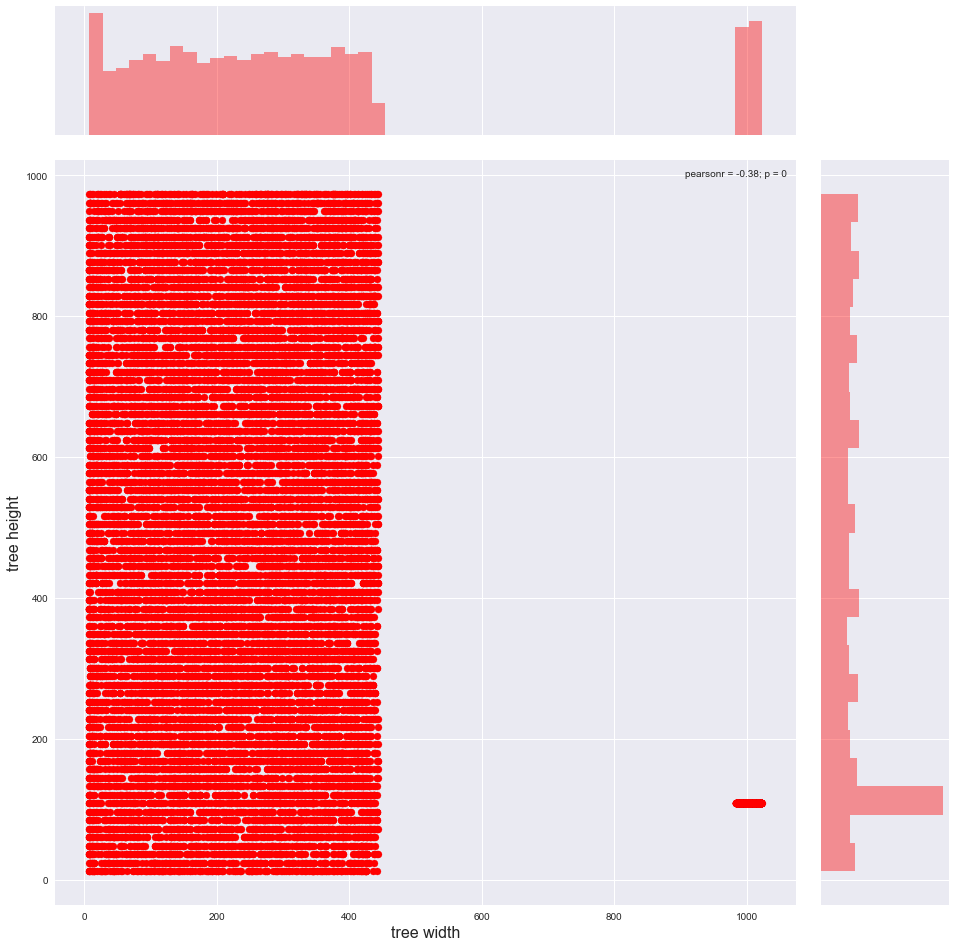

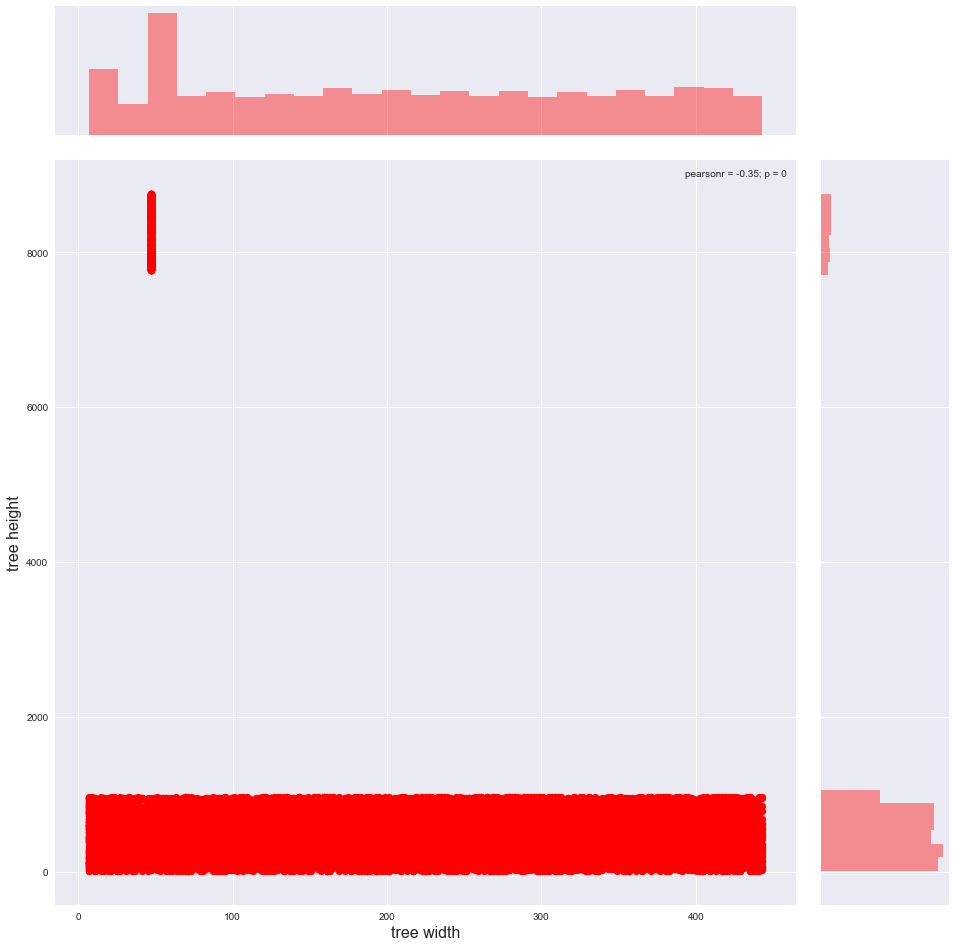

In [35]:
filenames = ["0_UNIFORM.in", "1_RAND.in", "2_RANDCONSTHEIGHT.in", "3_RANDCONSTWIDTH.in", 
             "4_SKEWED.in", "5_SKEWEDCONSTHEIGHT.in", "6_SKEWEDCONSTWIDTH.in"]
print_jointplots(filenames)

In [27]:
list(widths).count(501)

5

file: wmp/data/1000/unif_book_hw_1000.in


/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


file: wmp/data/1000/rand_hw_1000.in


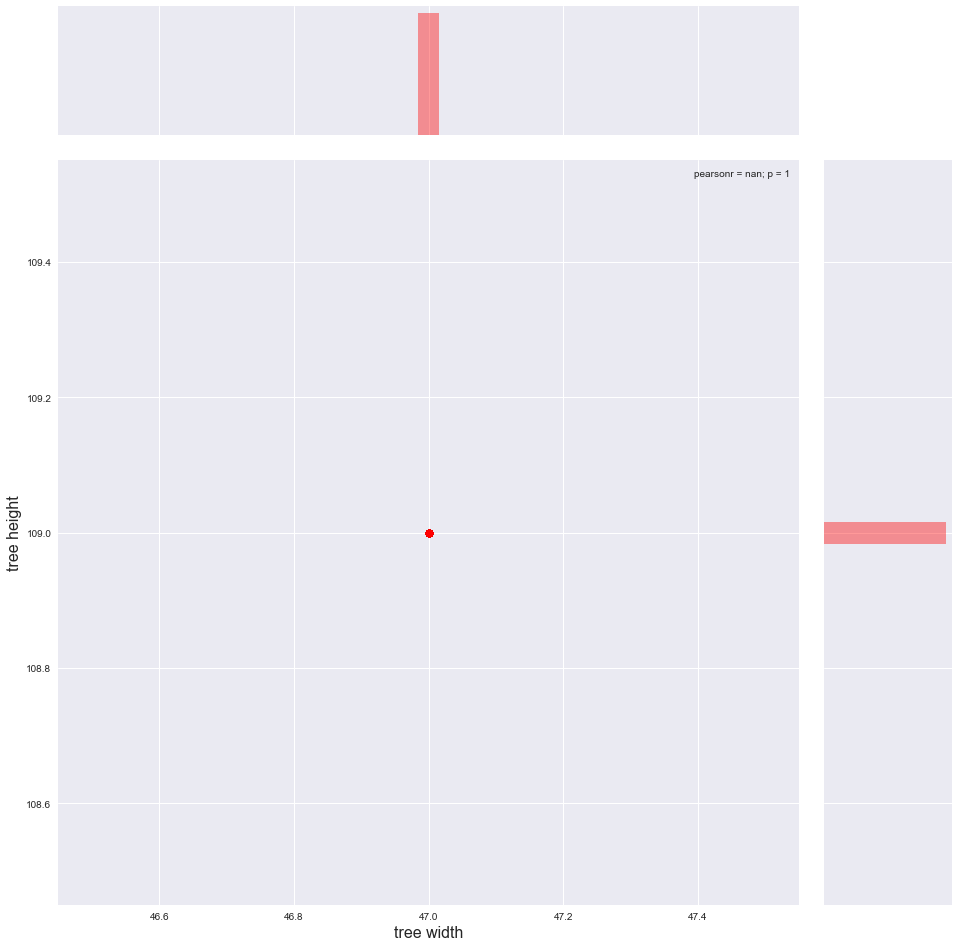

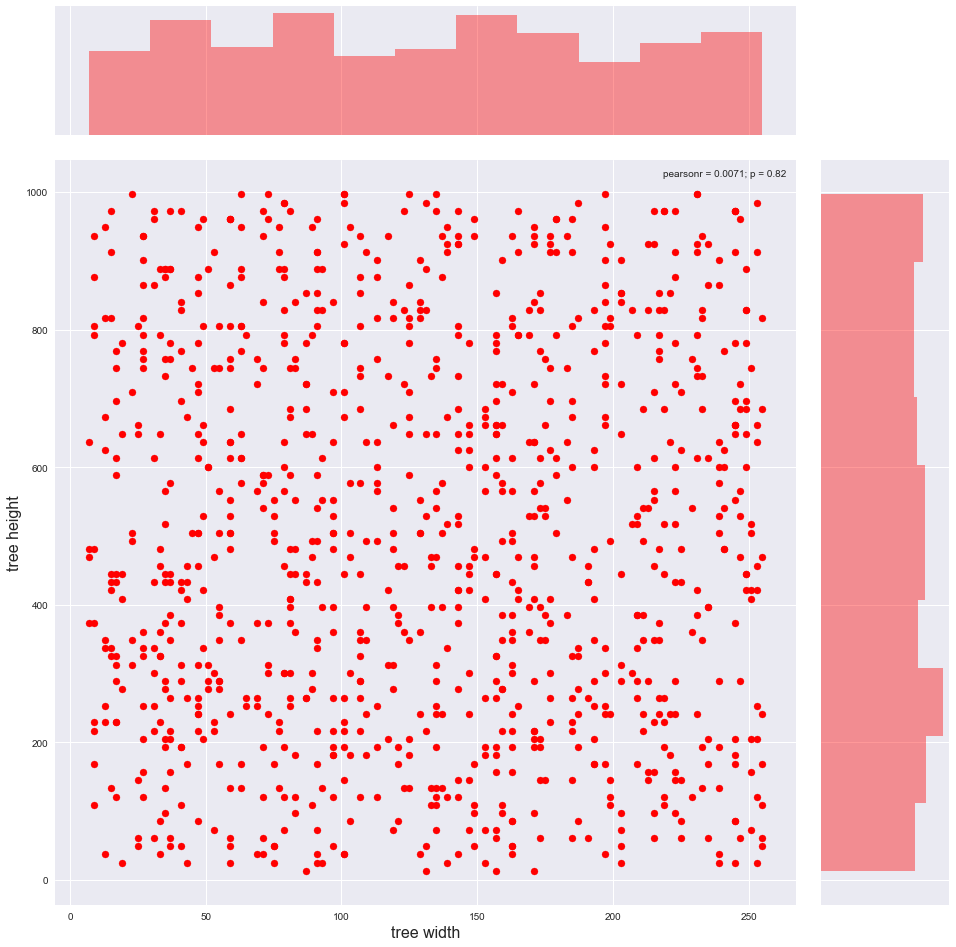

In [44]:
filenames = ["wmp/data/1000/unif_book_hw_1000.in", "wmp/data/1000/rand_hw_1000.in"]
print_jointplots(filenames)

file: wmp/data/100000/rand_h_unif_w_100000.in


/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


file: wmp/data/100000/rand_hw_100000.in
file: wmp/data/100000/rand_w_unif_h_100000.in
file: wmp/data/100000/skew_h_1_rand_w_100000.in
file: wmp/data/100000/skew_h_10_rand_w_100000.in
file: wmp/data/100000/skew_hw_1_100000.in
file: wmp/data/100000/skew_hw_10_100000.in
file: wmp/data/100000/skew_w_1_rand_h_100000.in
file: wmp/data/100000/skew_w_10_rand_h_100000.in
file: wmp/data/100000/unif_book_hw_100000.in
file: wmp/data/100000/unif_hw_100000.in


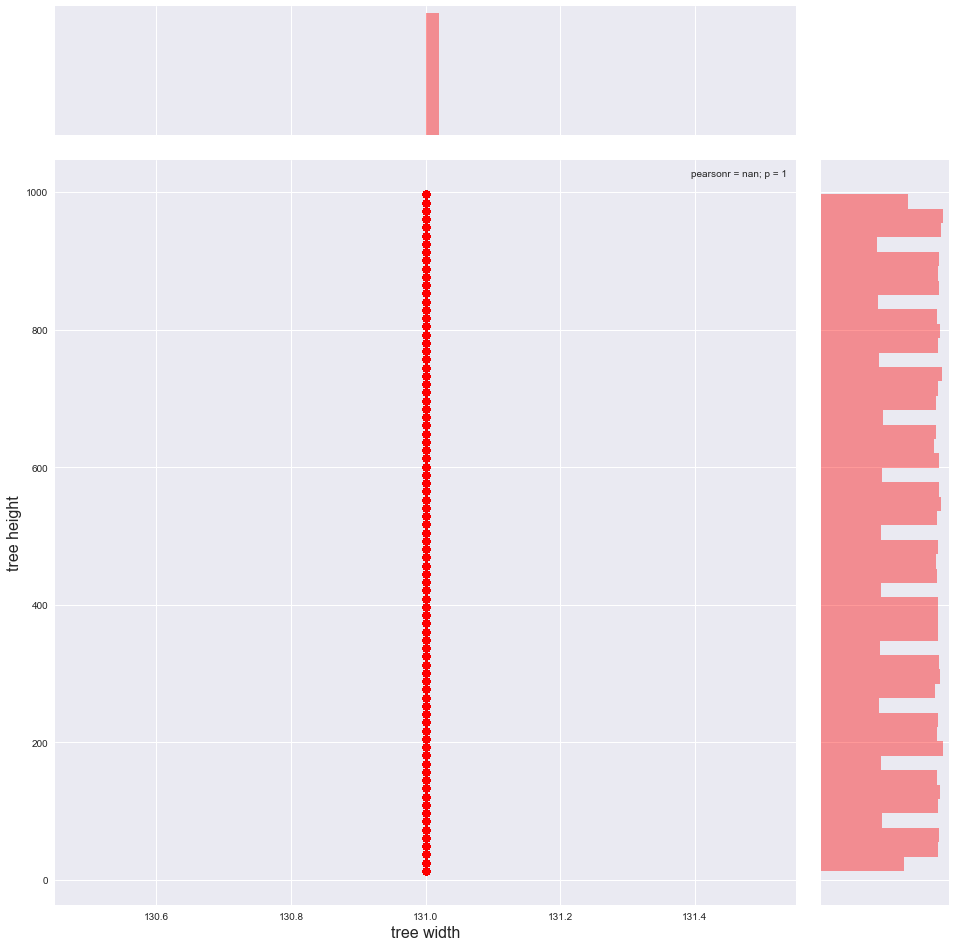

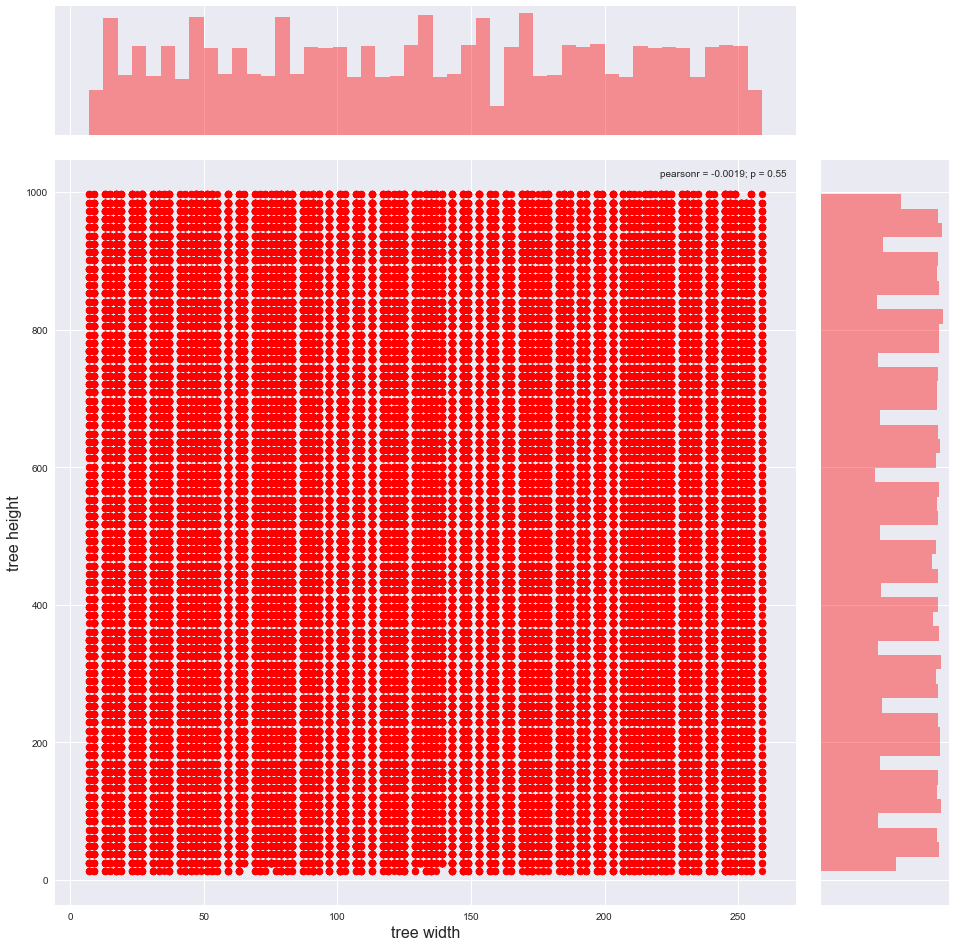

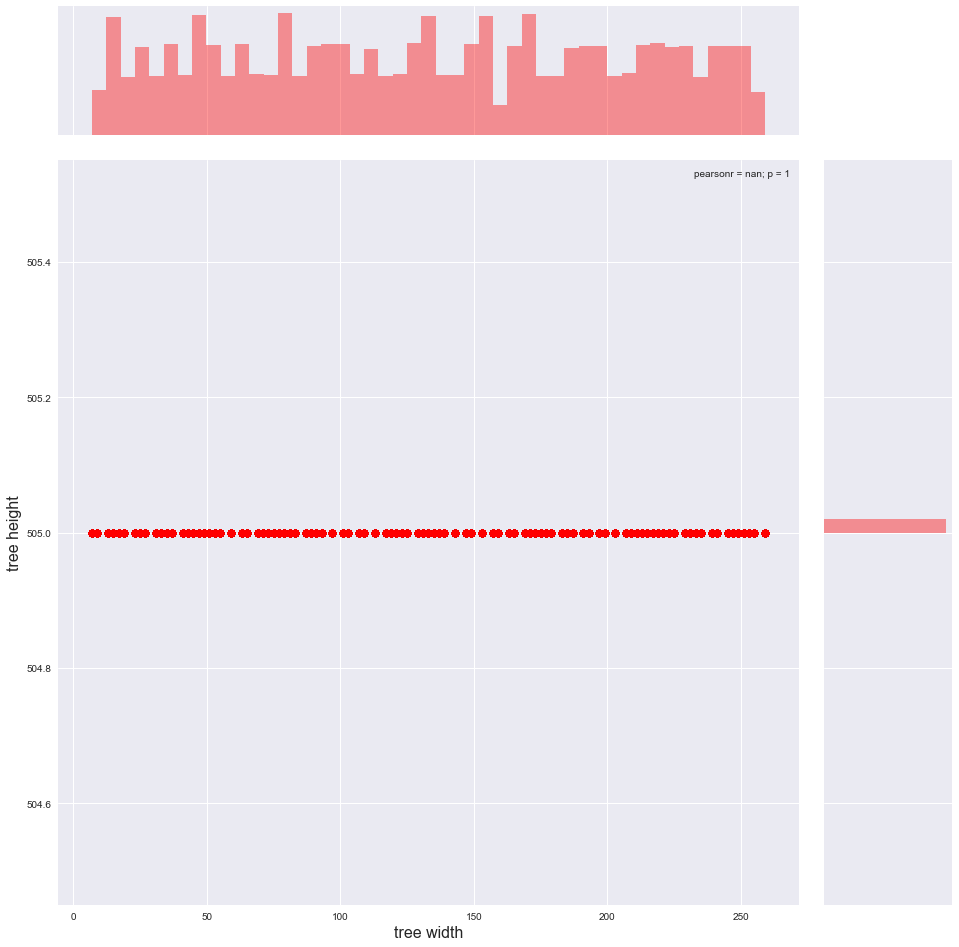

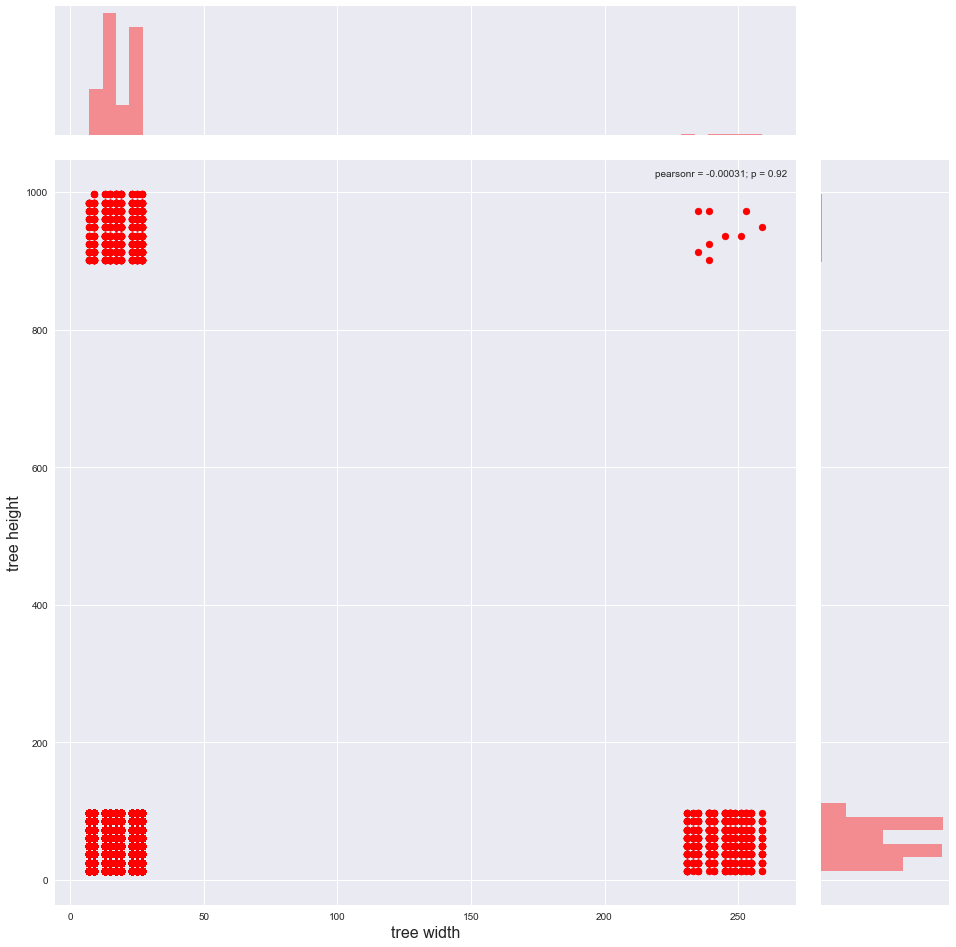

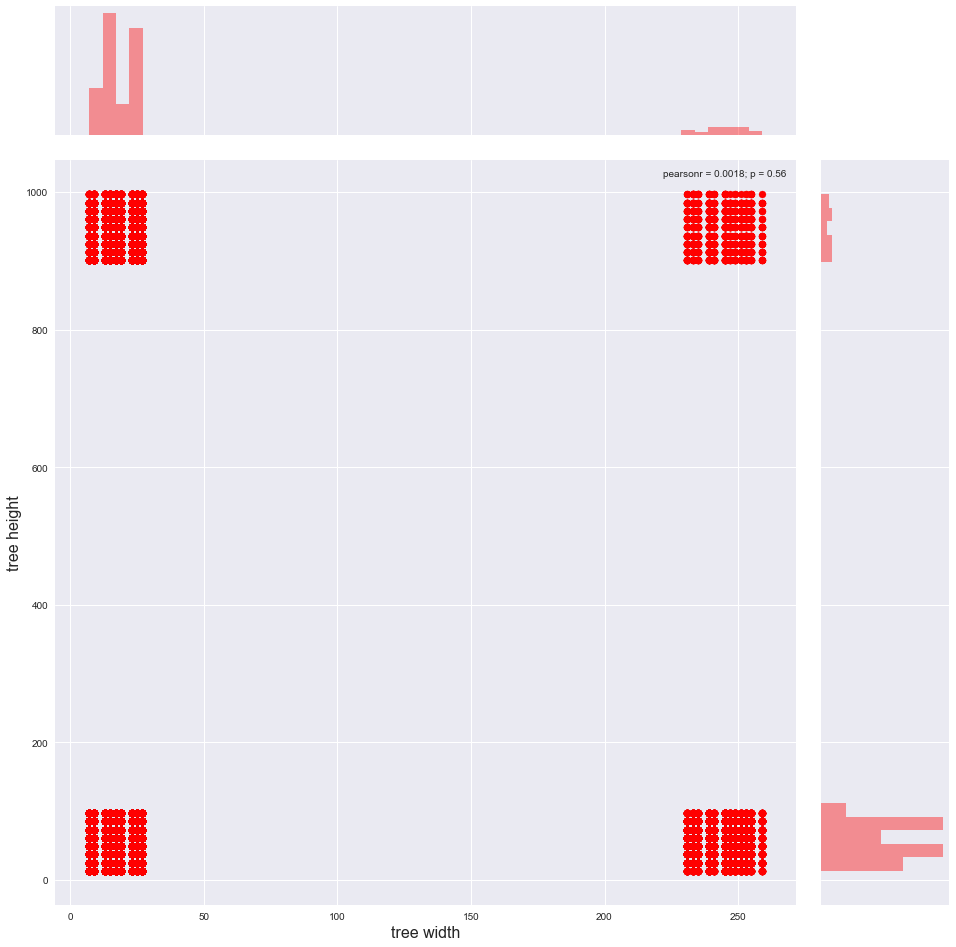

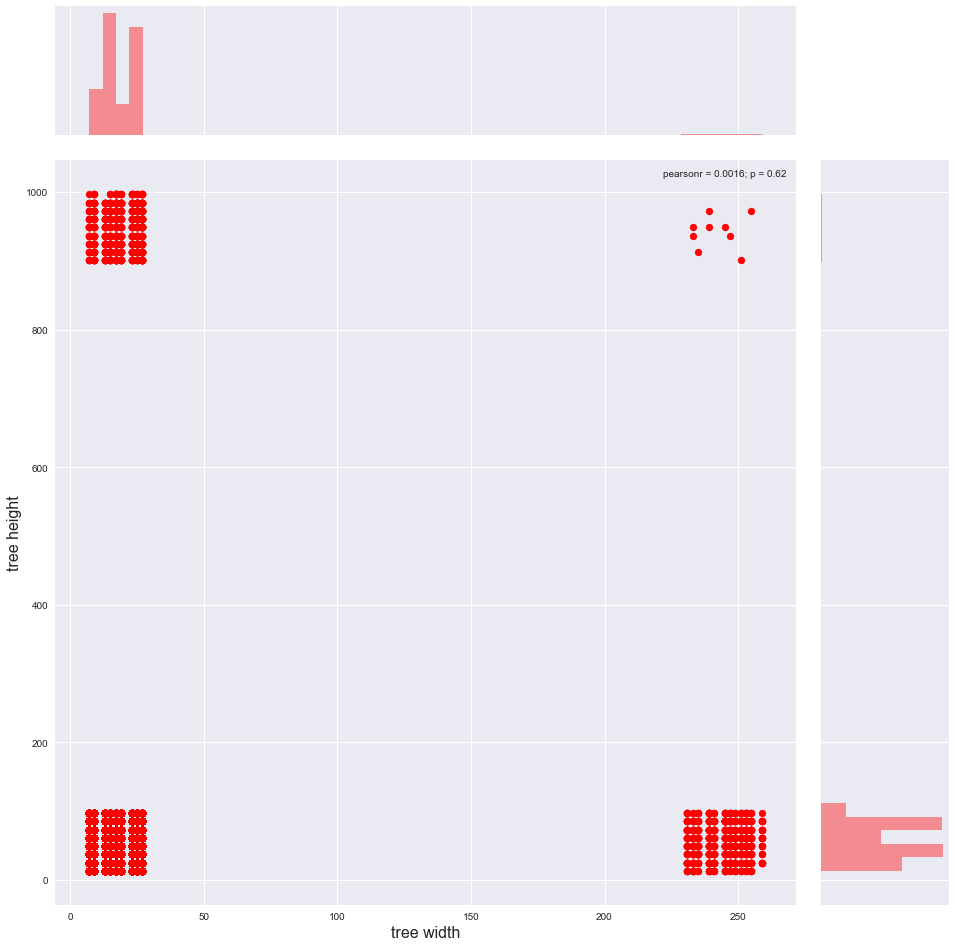

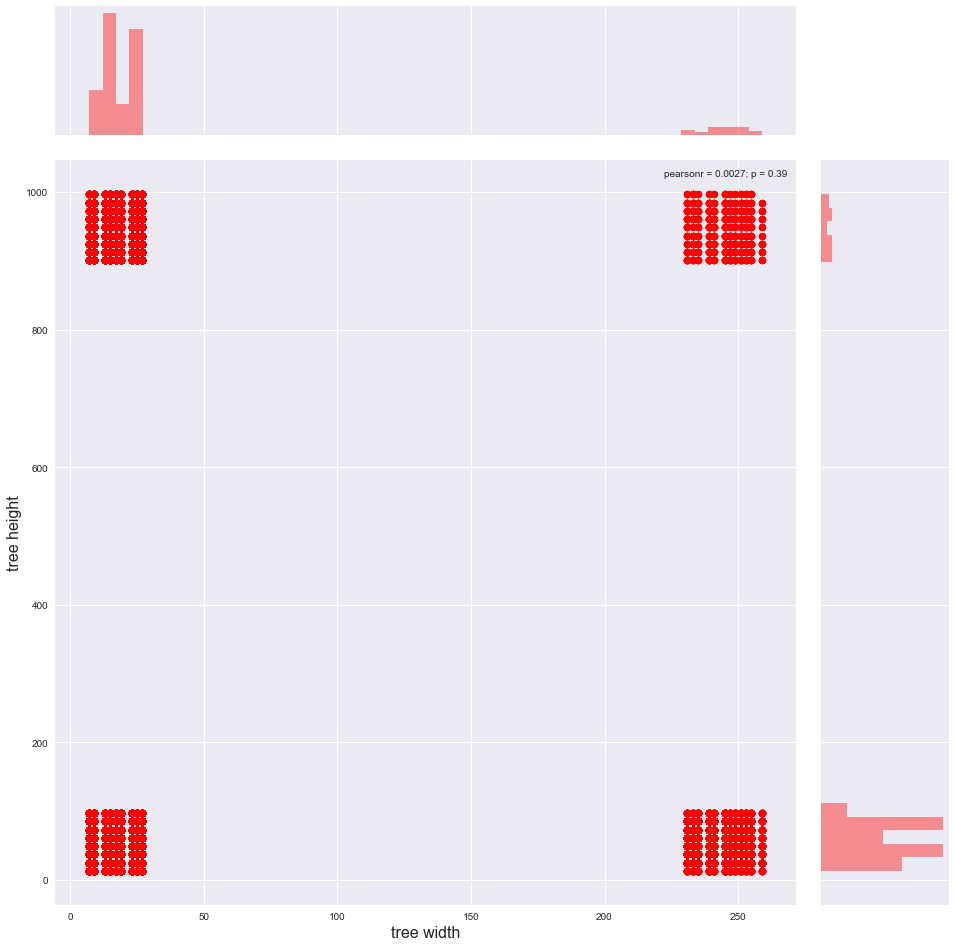

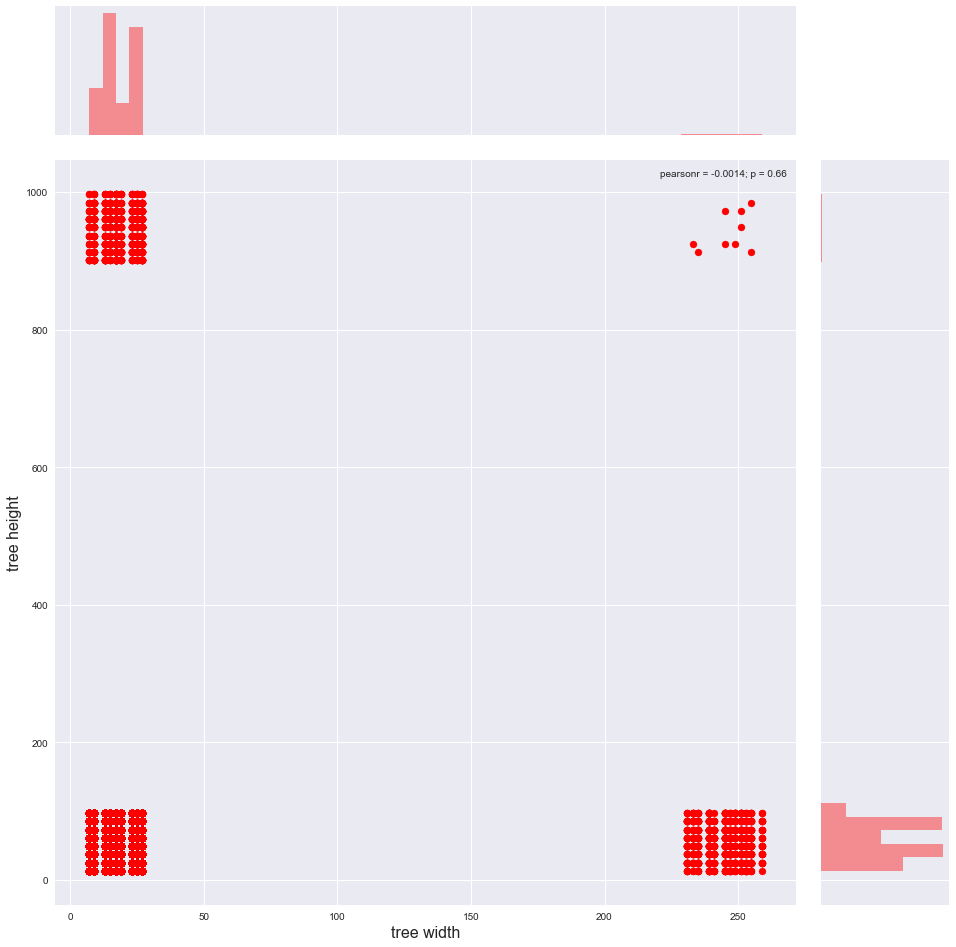

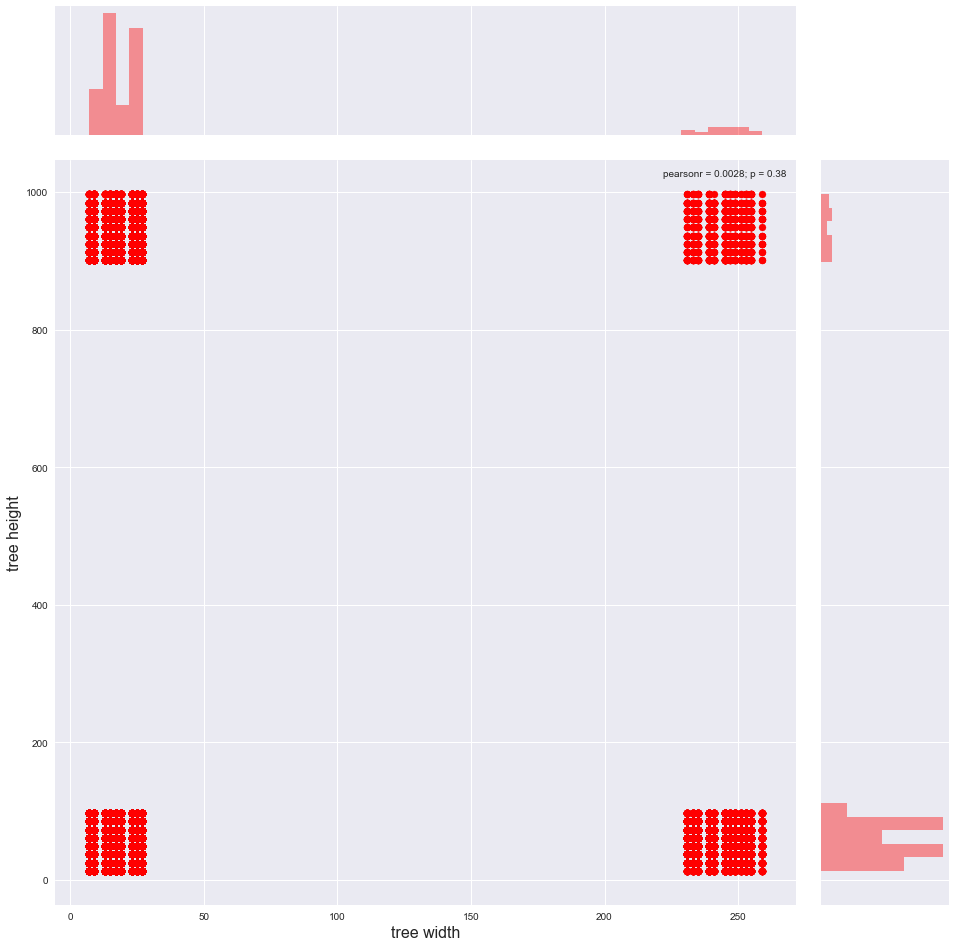

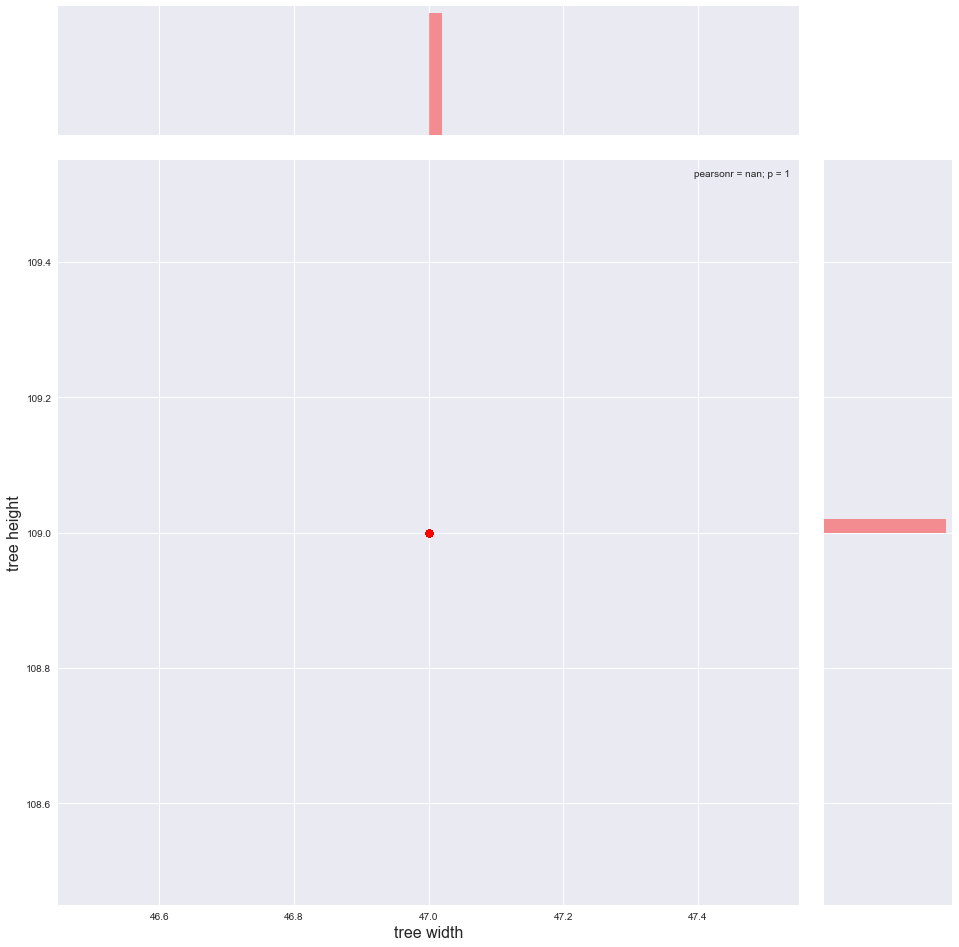

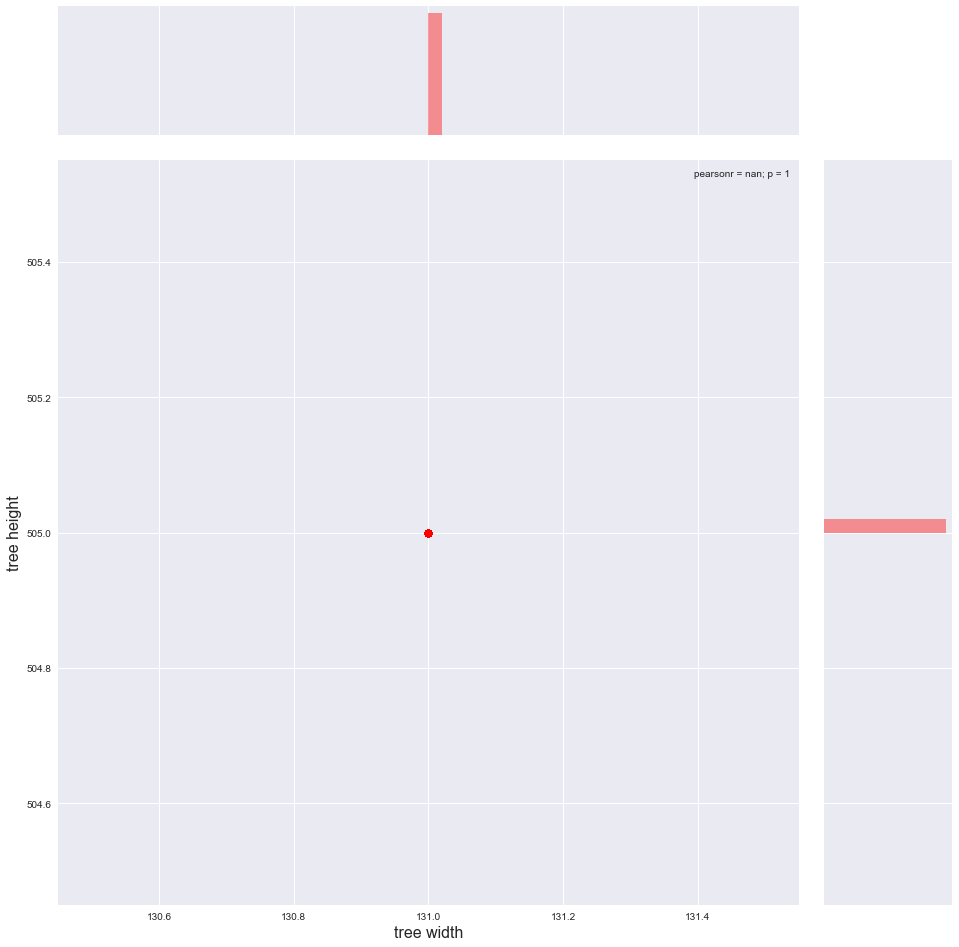

In [47]:
filenames = ["rand_h_unif_w_100000.in",
"rand_hw_100000.in",
"rand_w_unif_h_100000.in",
"skew_h_1_rand_w_100000.in",
"skew_h_10_rand_w_100000.in",
"skew_hw_1_100000.in",
"skew_hw_10_100000.in",
"skew_w_1_rand_h_100000.in",
"skew_w_10_rand_h_100000.in",
"unif_book_hw_100000.in",
"unif_hw_100000.in"]
filenames = list(map(lambda f: 'wmp/data/100000/' + f, filenames))
print_jointplots(filenames)

In [50]:
filenames = ["rand_h_unif_w_100000.in",
"rand_hw_100000.in",
"rand_w_unif_h_100000.in",
"skew_h_1_rand_w_100000.in",
"skew_h_10_rand_w_100000.in",
"skew_hw_1_100000.in",
"skew_hw_10_100000.in",
"skew_w_1_rand_h_100000.in",
"skew_w_10_rand_h_100000.in",
"unif_book_hw_100000.in",
"unif_hw_100000.in"]
filenames = list(map(lambda f: 'wmp/data/100000/' + f, filenames))

for f in filenames:
    options = get_options(f)
    op_len = len(options)

    print('file: ' + f)
    widths = np.array(list(map(lambda o: o.width,options)))
    heights = np.array(list(map(lambda o: o.height,options)))
    totalWidth = np.sum(widths)
    totalHeight = np.sum(heights)
    prod = totalWidth * totalHeight
    print(totalWidth)
    print(totalHeight)
    print(prod)
    print('\n')

file: wmp/data/100000/rand_h_unif_w_100000.in
13100000
50572600
662501060000000


file: wmp/data/100000/rand_hw_100000.in
13317984
50588116
673731719478144


file: wmp/data/100000/rand_w_unif_h_100000.in
13290078
50500000
671148939000000


file: wmp/data/100000/skew_h_1_rand_w_100000.in
2047420
6430948
13166851554160


file: wmp/data/100000/skew_h_10_rand_w_100000.in
4076732
14449276
58905825846032


file: wmp/data/100000/skew_hw_1_100000.in
2046698
6440548
13181856710504


file: wmp/data/100000/skew_hw_10_100000.in
4076204
14456560
58927887698240


file: wmp/data/100000/skew_w_1_rand_h_100000.in
2046466
6431872
13162607364352


file: wmp/data/100000/skew_w_10_rand_h_100000.in
4077316
14442328
58885935031648


file: wmp/data/100000/unif_book_hw_100000.in
4700000
10900000
51230000000000


file: wmp/data/100000/unif_hw_100000.in
13100000
50500000
661550000000000


